<a href="https://colab.research.google.com/github/ncirak/ML/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import csv
from itertools import zip_longest
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Dataset and Exloratory Data Analysis

In [ ]:
train_df = pd.read_excel('/content/drive/My Drive/train.xlsx')
test_df = pd.read_excel('/content/drive/My Drive/test.xlsx')

In [ ]:
train_df.head(3)

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,NaN,NaN,Very useful,NaN,NaN,NaN,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,NaN,Always,Random Forests,Often,NaN,Often,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,NaN,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,NaN,NaN,NaN,Very useful,NaN,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,NaN,Sometimes,Most of the time,NaN,NaN,NaN,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,100% of projects,More internal than external,Business Department,NaN,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,NaN,Often,Often,NaN,NaN,Often,Sometimes,NaN,Sometimes,NaN,Sometimes,NaN,NaN,Sometimes,NaN,Most of the time,2.0,10-25% of projects,More internal than external,Other,Rarely,6


In [ ]:
#Dataset info
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      5529 non-null   int64  
 1   GenderSelect                            5519 non-null   object 
 2   Country                                 5513 non-null   object 
 3   Age                                     5461 non-null   float64
 4   EmploymentStatus                        5529 non-null   object 
 5   CodeWriter                              5529 non-null   object 
 6   CurrentJobTitleSelect                   5527 non-null   object 
 7   TitleFit                                5427 non-null   object 
 8   CurrentEmployerType                     5458 non-null   object 
 9   MLToolNextYearSelect                    5298 non-null   object 
 10  MLMethodNextYearSelect                  5252 non-null   obje

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      1000 non-null   int64  
 1   GenderSelect                            998 non-null    object 
 2   Country                                 998 non-null    object 
 3   Age                                     986 non-null    float64
 4   EmploymentStatus                        1000 non-null   object 
 5   CodeWriter                              1000 non-null   object 
 6   CurrentJobTitleSelect                   1000 non-null   object 
 7   TitleFit                                980 non-null    object 
 8   CurrentEmployerType                     986 non-null    object 
 9   MLToolNextYearSelect                    956 non-null    object 
 10  MLMethodNextYearSelect                  953 non-null    objec

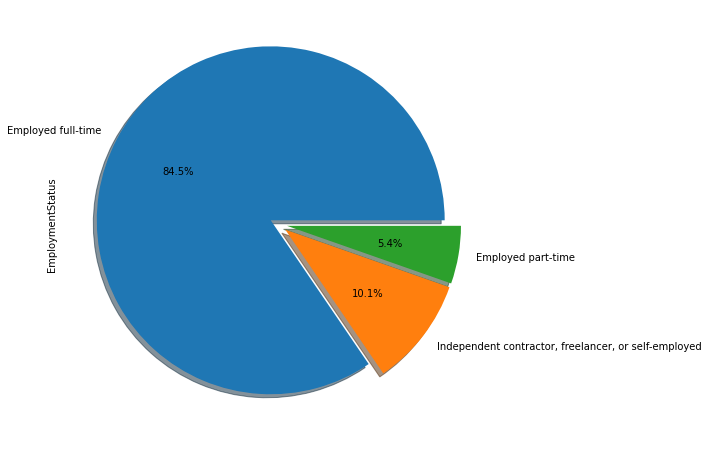

In [ ]:
f,ax=plt.subplots(figsize=(18,8))

train_df['EmploymentStatus'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
train_df['EmploymentStatus'].value_counts()                   

Employed full-time                                      4673
Independent contractor, freelancer, or self-employed     559
Employed part-time                                       297
Name: EmploymentStatus, dtype: int64

6.727369997860047 7.116279069767442 6.734006734006734


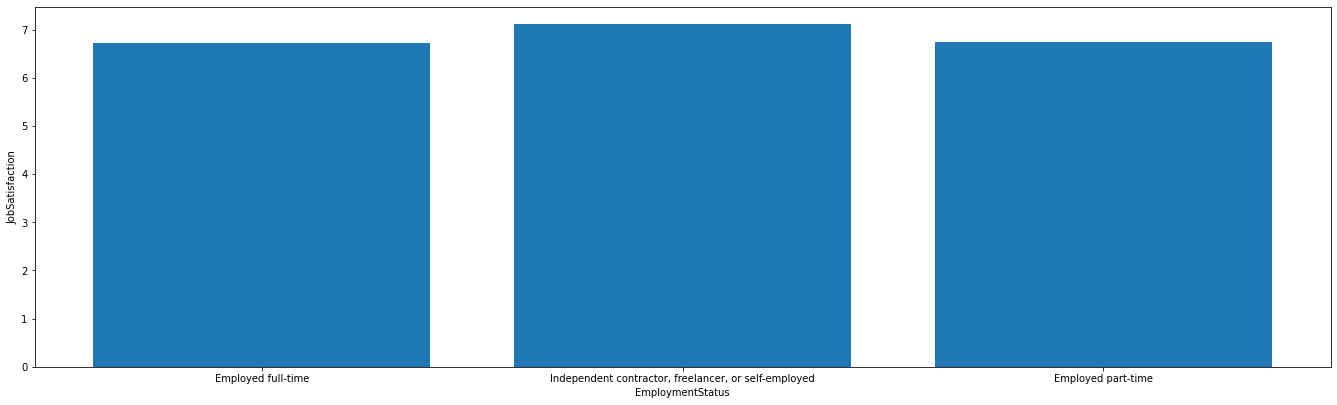

In [ ]:
i = train_df[train_df["EmploymentStatus"]=="Employed full-time"]["JobSatisfaction"].mean()
j= train_df[train_df["EmploymentStatus"]=="Independent contractor, freelancer, or self-employed"]["JobSatisfaction"].mean()
k = train_df[train_df["EmploymentStatus"]=="Employed part-time"]["JobSatisfaction"].mean()

print(i, j, k)
fig = plt.figure(figsize=(18,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("JobSatisfaction")
ax.set_xlabel("EmploymentStatus")
f=["Employed full-time","Independent contractor, freelancer, or self-employed" , "Employed part-time"]
g= [i, j, k]
ax.bar(f, g)
plt.show()

In [ ]:
train_df['FormalEducation'].value_counts()                   

Master's degree                                                      2523
Bachelor's degree                                                    1368
Doctoral degree                                                      1231
Professional degree                                                   175
Some college/university study without earning a bachelor's degree     170
I did not complete any formal education past high school               37
I prefer not to answer                                                 18
Name: FormalEducation, dtype: int64

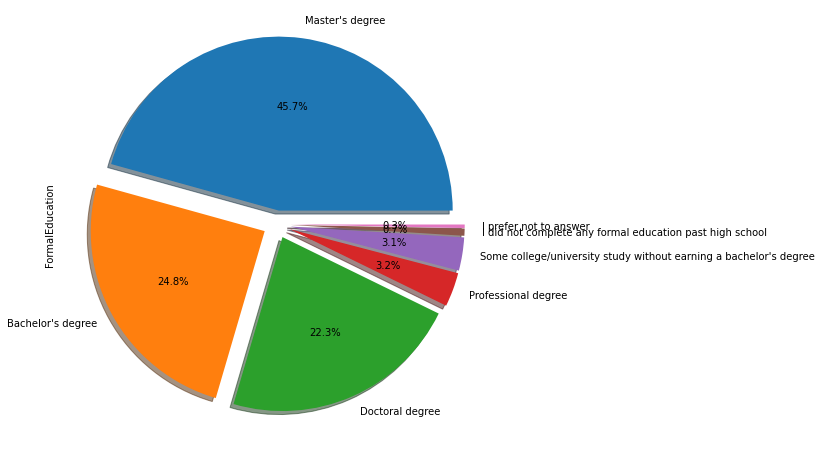

In [ ]:
f,ax=plt.subplots(figsize=(18,8))
train_df['FormalEducation'].value_counts().plot.pie(explode=[0.08,0.08,0.08, 0.08,0.08,0.08,0.08],autopct='%1.1f%%',shadow=True)
plt.show()

6.756756756756757 6.6647058823529415 6.567251461988304 6.737613951644867 7.085296506904955 6.474285714285714


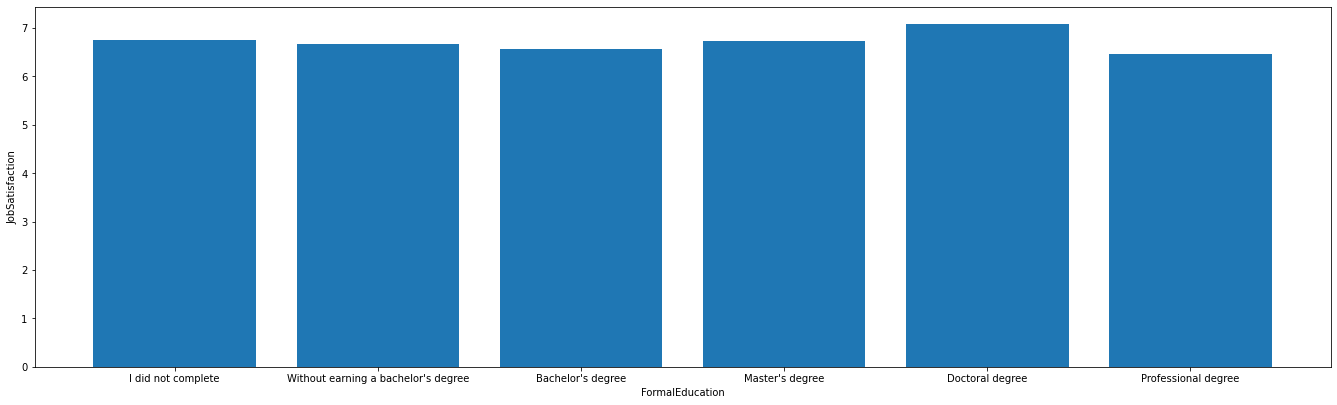

In [ ]:
x = train_df[train_df["FormalEducation"]=="I did not complete any formal education past high school"]["JobSatisfaction"].mean()
y = train_df[train_df["FormalEducation"]=="Some college/university study without earning a bachelor's degree"]["JobSatisfaction"].mean()
z = train_df[train_df["FormalEducation"]=="Bachelor's degree"]["JobSatisfaction"].mean()
t = train_df[train_df["FormalEducation"]=="Master's degree"]["JobSatisfaction"].mean()
w = train_df[train_df["FormalEducation"]=="Doctoral degree"]["JobSatisfaction"].mean()
q = train_df[train_df["FormalEducation"]=="Professional degree"]["JobSatisfaction"].mean()

print(x, y, z, t,w, q)
fig = plt.figure(figsize=(18,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("JobSatisfaction")
ax.set_xlabel("FormalEducation")
f = ["I did not complete", "Without earning a bachelor's degree", "Bachelor's degree", "Master's degree", "Doctoral degree", "Professional degree"]
g= [x, y, z, t, w, q]
ax.bar(f, g)
plt.show()

In [ ]:
train_df['GenderSelect'].value_counts()

Male                                                 4682
Female                                                768
A different identity                                   41
Non-binary, genderqueer, or gender non-conforming      28
Name: GenderSelect, dtype: int64

6.791114908158907 6.618489583333333 7.2926829268292686


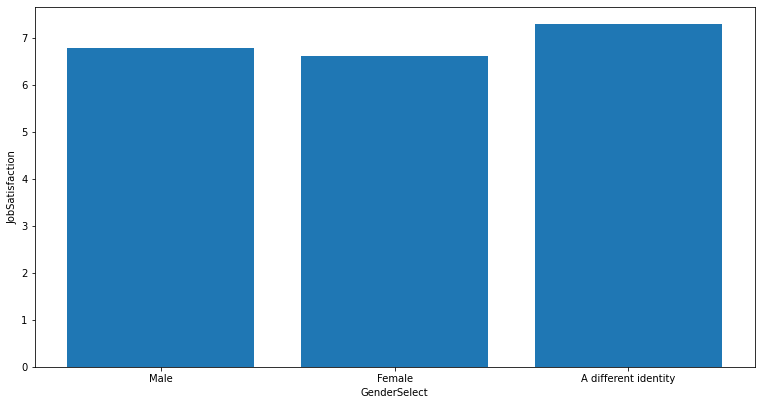

In [ ]:
a = train_df[train_df["GenderSelect"]=="Male"]["JobSatisfaction"].mean()
b = train_df[train_df["GenderSelect"]=="Female"]["JobSatisfaction"].mean()
c = train_df[train_df["GenderSelect"]=="A different identity"]["JobSatisfaction"].mean()
print(a,b,c)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("JobSatisfaction")
ax.set_xlabel("GenderSelect")
f = ["Male", "Female", "A different identity"]
g= [a,b,c]
ax.bar(f, g)
plt.show()

In [ ]:
print("Mean of Age", train_df['Age'].mean())
print("Mode of Age",train_df['Age'].mode()[0])

Mean of Age 34.46163706280901
Mode of Age 28.0


In [ ]:
train_df['TitleFit'].unique()

array(['Fine', 'Poorly', 'Perfectly', nan], dtype=object)

5.921228304405875 6.765831691528286 7.375111111111111


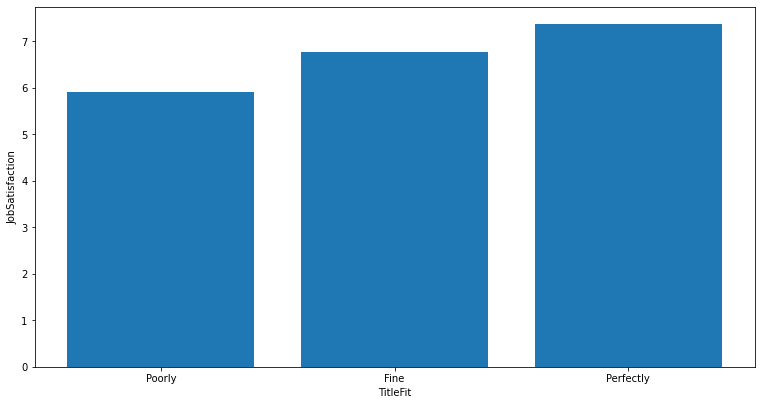

In [ ]:
x= train_df[train_df["TitleFit"]=="Poorly"]["JobSatisfaction"].mean()
y = train_df[train_df["TitleFit"]=="Fine"]["JobSatisfaction"].mean()
z = train_df[train_df["TitleFit"]=="Perfectly"]["JobSatisfaction"].mean()

print(x, y, z)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("JobSatisfaction")
ax.set_xlabel("TitleFit")
f = [ "Poorly", "Fine","Perfectly"]
g= [x, y, z]
ax.bar(f, g)
plt.show()

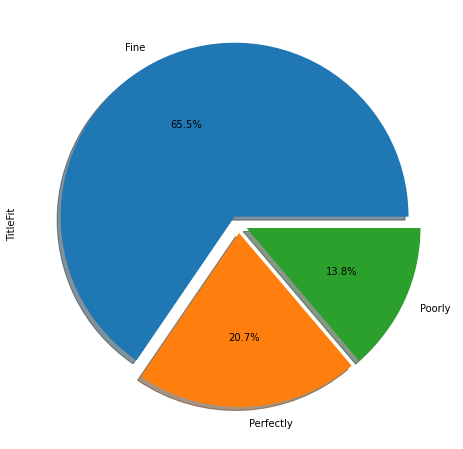

In [ ]:
f,ax=plt.subplots(figsize=(18,8))
train_df['TitleFit'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

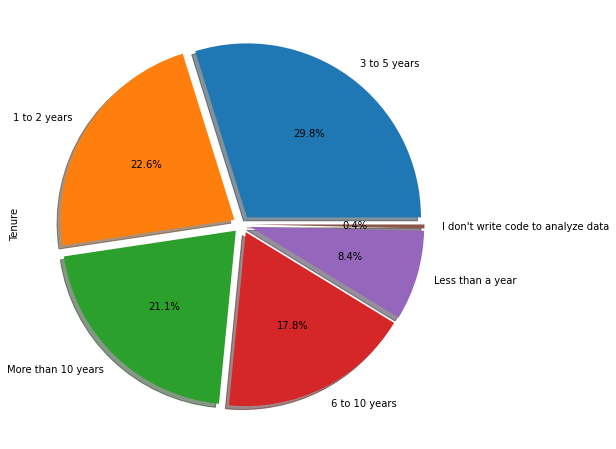

In [ ]:
f,ax=plt.subplots(figsize=(18,8))
train_df['Tenure'].value_counts().plot.pie(explode=[0.05,0.05,0.05, 0.05, 0.05, 0.05],autopct='%1.1f%%',shadow=True)
plt.show()

6.29004329004329 6.658360128617363 6.787712895377129 6.8146639511201625 7.035253654342219


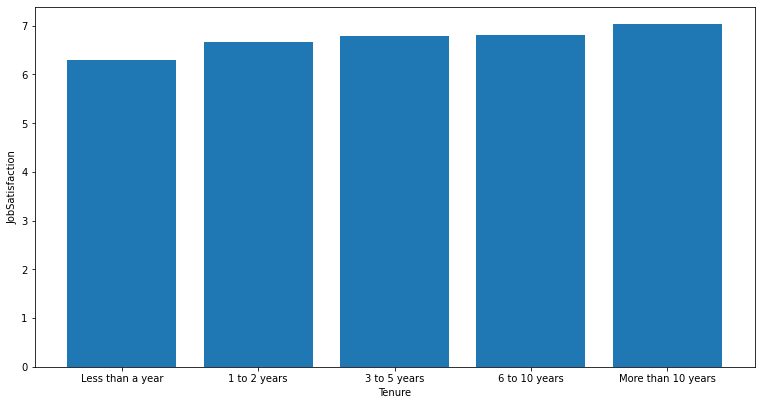

In [ ]:
x = train_df[train_df["Tenure"]=="Less than a year"]["JobSatisfaction"].mean()
y = train_df[train_df["Tenure"]=="1 to 2 years"]["JobSatisfaction"].mean()
z = train_df[train_df["Tenure"]=="3 to 5 years"]["JobSatisfaction"].mean()
t = train_df[train_df["Tenure"]=="6 to 10 years"]["JobSatisfaction"].mean()
w = train_df[train_df["Tenure"]=="More than 10 years"]["JobSatisfaction"].mean()
#q = train_df[train_df["Tenure"]=="I don't write code to analyze data"]["JobSatisfaction"].mean()

print(x, y, z, t,w)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("JobSatisfaction")
ax.set_xlabel("Tenure")
f = ["Less than a year", "1 to 2 years", "3 to 5 years", "6 to 10 years", "More than 10 years"]
g= [x, y, z, t, w]
ax.bar(f, g)
plt.show()

In [ ]:
train_df['EmployerSize'].value_counts()

10,000 or more employees    1092
100 to 499 employees         841
20 to 99 employees           798
1,000 to 4,999 employees     736
500 to 999 employees         406
10 to 19 employees           314
5,000 to 9,999 employees     293
Fewer than 10 employees      291
I don't know                 140
I prefer not to answer        37
Name: EmployerSize, dtype: int64

6.890034364261169 6.640127388535032 6.819548872180451 6.696789536266349 6.768472906403941 6.751358695652174 6.726962457337884 6.601648351648351


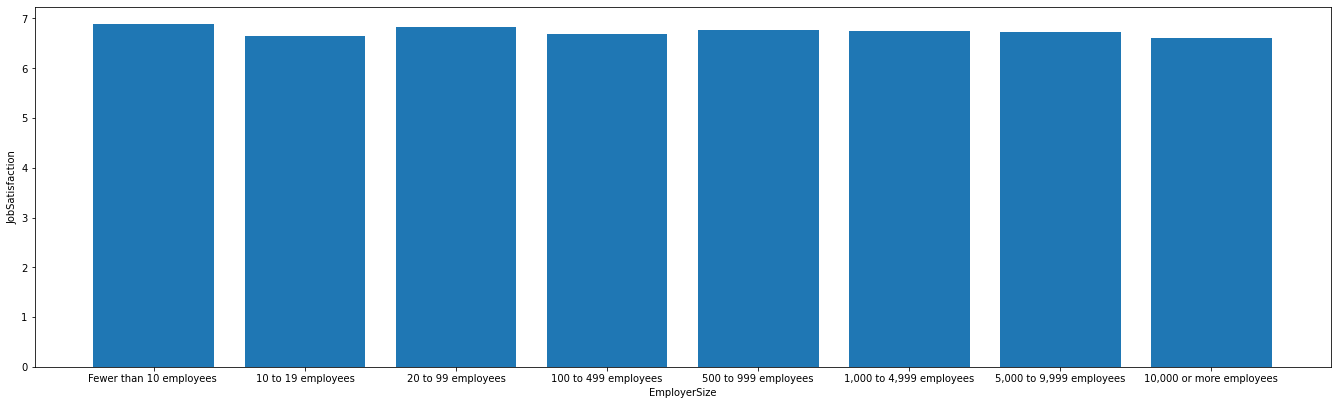

In [ ]:
x = train_df[train_df["EmployerSize"]=="Fewer than 10 employees"]["JobSatisfaction"].mean()
y = train_df[train_df["EmployerSize"]=="10 to 19 employees"]["JobSatisfaction"].mean()
z = train_df[train_df["EmployerSize"]=="20 to 99 employees"]["JobSatisfaction"].mean()
t = train_df[train_df["EmployerSize"]=="100 to 499 employees"]["JobSatisfaction"].mean()
w = train_df[train_df["EmployerSize"]=="500 to 999 employees"]["JobSatisfaction"].mean()
q = train_df[train_df["EmployerSize"]=="1,000 to 4,999 employees"]["JobSatisfaction"].mean()
m = train_df[train_df["EmployerSize"]=="5,000 to 9,999 employees"]["JobSatisfaction"].mean()
n = train_df[train_df["EmployerSize"]=="10,000 or more employees"]["JobSatisfaction"].mean()

print(x, y, z, t,w , q,m,n)
fig = plt.figure(figsize=(18,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("JobSatisfaction")
ax.set_xlabel("EmployerSize")

f = ["Fewer than 10 employees ",  "10 to 19 employees" ,"20 to 99 employees", "100 to 499 employees", 
     "500 to 999 employees","1,000 to 4,999 employees", "5,000 to 9,999 employees",
     "10,000 or more employees" ]  
g= [x, y, z, t, w, q, m, n]
ax.bar(f, g)
plt.show()

##Choosing Attributes to Use

In [ ]:
train_y = train_df['JobSatisfaction']
train_y.head()

0    4
1    7
2    6
3    9
4    8
Name: JobSatisfaction, dtype: int64

In [ ]:
train_y.mean()

6.767046482184844

In [ ]:
train_x = train_df.drop(columns = ['ID','CodeWriter', 'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects', 
                                   'LearningPlatformUsefulnessSO', 'LearningPlatformUsefulnessTextbook', 'LearningPlatformUsefulnessYouTube', 'WorkMethodsFrequencyCross-Validation', 
                                   'WorkMethodsFrequencyDataVisualization', 'WorkMethodsFrequencyDecisionTrees', 'WorkMethodsFrequencyLogisticRegression',
                                   'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA', 'WorkMethodsFrequencyRandomForests', 'WorkMethodsFrequencyTimeSeriesAnalysis', 
                                   'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults' , 'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining', 
                                   'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity', 'WorkChallengeFrequencyDataAccess', 'JobSatisfaction'])
test_x = test_df.drop(columns = ['ID','CodeWriter', 'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects', 
                                   'LearningPlatformUsefulnessSO', 'LearningPlatformUsefulnessTextbook', 'LearningPlatformUsefulnessYouTube', 'WorkMethodsFrequencyCross-Validation', 
                                   'WorkMethodsFrequencyDataVisualization', 'WorkMethodsFrequencyDecisionTrees', 'WorkMethodsFrequencyLogisticRegression',
                                   'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA', 'WorkMethodsFrequencyRandomForests', 'WorkMethodsFrequencyTimeSeriesAnalysis', 
                                   'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults' , 'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining', 
                                   'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity', 'WorkChallengeFrequencyDataAccess'])


In [ ]:
train_x.shape

(5529, 29)

In [ ]:
test_x.shape

(1000, 29)

In [ ]:
test_x.info()
#to see how much nan-values are in the test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GenderSelect                  998 non-null    object 
 1   Country                       998 non-null    object 
 2   Age                           986 non-null    float64
 3   EmploymentStatus              1000 non-null   object 
 4   CurrentJobTitleSelect         1000 non-null   object 
 5   TitleFit                      980 non-null    object 
 6   CurrentEmployerType           986 non-null    object 
 7   MLToolNextYearSelect          956 non-null    object 
 8   MLMethodNextYearSelect        953 non-null    object 
 9   LanguageRecommendationSelect  962 non-null    object 
 10  DataScienceIdentitySelect     735 non-null    object 
 11  FormalEducation               999 non-null    object 
 12  MajorSelect                   926 non-null    object 
 13  Tenu

# Handling Missing Data and Forming Data
We can see that except "ID", "Employement status" and "code writer" features, there are missing values all over in the train data. 
Categorical features are given dummy variables with one-hot encoder technique.
Ordinal features are mapped to integer values so that the ordering is understandable by the ML models.


In [ ]:
train_x.isnull().any()

GenderSelect                     True
Country                          True
Age                              True
EmploymentStatus                False
CurrentJobTitleSelect            True
TitleFit                         True
CurrentEmployerType              True
MLToolNextYearSelect             True
MLMethodNextYearSelect           True
LanguageRecommendationSelect     True
DataScienceIdentitySelect        True
FormalEducation                  True
MajorSelect                      True
Tenure                           True
PastJobTitlesSelect              True
MLSkillsSelect                   True
MLTechniquesSelect               True
EmployerIndustry                 True
EmployerSize                     True
WorkProductionFrequency          True
WorkAlgorithmsSelect             True
WorkToolsFrequencyPython         True
WorkToolsFrequencyR              True
WorkToolsFrequencySQL            True
CompensationScore                True
WorkDataVisualizations           True
WorkInternal

In [ ]:
test_x.isnull().any()

GenderSelect                     True
Country                          True
Age                              True
EmploymentStatus                False
CurrentJobTitleSelect           False
TitleFit                         True
CurrentEmployerType              True
MLToolNextYearSelect             True
MLMethodNextYearSelect           True
LanguageRecommendationSelect     True
DataScienceIdentitySelect        True
FormalEducation                  True
MajorSelect                      True
Tenure                           True
PastJobTitlesSelect              True
MLSkillsSelect                   True
MLTechniquesSelect               True
EmployerIndustry                 True
EmployerSize                     True
WorkProductionFrequency          True
WorkAlgorithmsSelect             True
WorkToolsFrequencyPython         True
WorkToolsFrequencyR              True
WorkToolsFrequencySQL            True
CompensationScore                True
WorkDataVisualizations           True
WorkInternal

In [ ]:
for i in train_x.columns:
  if train_x[i].isnull().any:
    train_x[i] = train_x[i].fillna(train_x[i].mode()[0])

In [ ]:
for i in test_x.columns:
  if test_x[i].isnull().any:
    test_x[i] = test_x[i].fillna(test_x[i].mode()[0])

In [ ]:
test_x.isnull().any()

GenderSelect                    False
Country                         False
Age                             False
EmploymentStatus                False
CurrentJobTitleSelect           False
TitleFit                        False
CurrentEmployerType             False
MLToolNextYearSelect            False
MLMethodNextYearSelect          False
LanguageRecommendationSelect    False
DataScienceIdentitySelect       False
FormalEducation                 False
MajorSelect                     False
Tenure                          False
PastJobTitlesSelect             False
MLSkillsSelect                  False
MLTechniquesSelect              False
EmployerIndustry                False
EmployerSize                    False
WorkProductionFrequency         False
WorkAlgorithmsSelect            False
WorkToolsFrequencyPython        False
WorkToolsFrequencyR             False
WorkToolsFrequencySQL           False
CompensationScore               False
WorkDataVisualizations          False
WorkInternal

In [ ]:
train_x.isnull().any()

GenderSelect                    False
Country                         False
Age                             False
EmploymentStatus                False
CurrentJobTitleSelect           False
TitleFit                        False
CurrentEmployerType             False
MLToolNextYearSelect            False
MLMethodNextYearSelect          False
LanguageRecommendationSelect    False
DataScienceIdentitySelect       False
FormalEducation                 False
MajorSelect                     False
Tenure                          False
PastJobTitlesSelect             False
MLSkillsSelect                  False
MLTechniquesSelect              False
EmployerIndustry                False
EmployerSize                    False
WorkProductionFrequency         False
WorkAlgorithmsSelect            False
WorkToolsFrequencyPython        False
WorkToolsFrequencyR             False
WorkToolsFrequencySQL           False
CompensationScore               False
WorkDataVisualizations          False
WorkInternal

In [ ]:
#By using max-min scaling, make Age column scaled on TRAIN
train_x["Age"]= (train_x["Age"]-train_x["Age"].min())/(train_x["Age"].max()-train_x["Age"].min())

#By using max-min scaling, make Age column scaled on Test
test_x["Age"]= (test_x["Age"]-test_x["Age"].min())/(test_x["Age"].max()-test_x["Age"].min())

In [ ]:
#By using max-min scaling, make CompensationScore column scaled on TRAIN
train_x["CompensationScore"]= (train_x["CompensationScore"]-train_x["CompensationScore"].min())/(train_x["CompensationScore"].max()-train_x["CompensationScore"].min())

#By using max-min scaling, make CompensationScore column scaled on Test
test_x["CompensationScore"]= (test_x["CompensationScore"]-test_x["CompensationScore"].min())/(test_x["CompensationScore"].max()-test_x["CompensationScore"].min())

In [ ]:
##ON TEST DATA
##Fit transform with train_x data
from sklearn.preprocessing import OneHotEncoder

cat_enc_test = OneHotEncoder(handle_unknown='ignore')
cat_enc_fit_test= cat_enc_test.fit_transform(train_x[["GenderSelect", "Country", "EmploymentStatus", "CurrentJobTitleSelect", "MLToolNextYearSelect", 
                                                     "MLMethodNextYearSelect", "LanguageRecommendationSelect", "MajorSelect","EmployerIndustry", "WorkInternalVsExternalTools",
                                                     "WorkMLTeamSeatSelect"]]).toarray()
cat_enc_fit_test_df=pd.DataFrame(cat_enc_fit_test)

test_x = pd.merge(test_x, cat_enc_fit_test_df, right_index=True,left_index=True)
test_x = test_x.drop(columns=["GenderSelect", "Country", "EmploymentStatus", "CurrentJobTitleSelect", "MLToolNextYearSelect", "MLMethodNextYearSelect", 
                             "LanguageRecommendationSelect", "MajorSelect","EmployerIndustry", "WorkInternalVsExternalTools", 
                              "WorkMLTeamSeatSelect"])

In [ ]:
#ONE HOT ENCODING is applied to the ones that are categorical values

cat_enc    = OneHotEncoder(handle_unknown='ignore')
cat_enc_fit= cat_enc.fit_transform(train_x[["GenderSelect", "Country", "EmploymentStatus", "CurrentJobTitleSelect", "MLToolNextYearSelect", 
                                "MLMethodNextYearSelect", "LanguageRecommendationSelect", "MajorSelect","EmployerIndustry", "WorkInternalVsExternalTools", 
                                "WorkMLTeamSeatSelect"]]).toarray()
cat_enc_fit_df = pd.DataFrame(cat_enc_fit)

train_x = pd.merge(train_x, cat_enc_fit_df ,right_index=True,left_index=True)
train_x = train_x.drop(columns=["GenderSelect", "Country", "EmploymentStatus", "CurrentJobTitleSelect", "MLToolNextYearSelect", 
                              "MLMethodNextYearSelect", "LanguageRecommendationSelect", "MajorSelect","EmployerIndustry", "WorkInternalVsExternalTools", 
                              "WorkMLTeamSeatSelect"])


In [ ]:
train_x.shape

(5529, 223)

In [ ]:
test_x.shape

(1000, 223)

In [ ]:
#MULTIVARIABLE ONE HOT ENCODER ON Train

dum_cum=train_x['CurrentEmployerType'].str.get_dummies(sep=',')
train_x = pd.merge(train_x ,dum_cum ,right_index=True,left_index=True)
train_x = train_x.drop(columns="CurrentEmployerType")

dum_past=train_x['PastJobTitlesSelect'].str.get_dummies(sep=',')
train_x = pd.merge(train_x ,dum_past ,right_index=True,left_index=True)
train_x = train_x.drop(columns="PastJobTitlesSelect")

dum_mltech=train_x['MLTechniquesSelect'].str.get_dummies(sep=',')
train_x = pd.merge(train_x ,dum_mltech ,right_index=True,left_index=True)
train_x = train_x.drop(columns="MLTechniquesSelect")

dum_workalgo=train_x['WorkAlgorithmsSelect'].str.get_dummies(sep=',')
train_x = pd.merge(train_x ,dum_workalgo ,right_index=True,left_index=True)
train_x = train_x.drop(columns="WorkAlgorithmsSelect")

dum_mlskil=train_x['MLSkillsSelect'].str.get_dummies(sep=',')
train_x = pd.merge(train_x ,dum_mlskil ,right_index=True,left_index=True)
train_x = train_x.drop(columns="MLSkillsSelect")

In [ ]:
##MULTIVARIABLE ONE HOT ENCODER ON TESTT DATA
dum_cum=  test_x['CurrentEmployerType'].str.get_dummies(sep=',')
test_x = pd.merge(test_x ,dum_cum ,right_index=True,left_index=True)
test_x = test_x.drop(columns="CurrentEmployerType")

dum_past=test_x['PastJobTitlesSelect'].str.get_dummies(sep=',')
test_x = pd.merge(test_x ,dum_past ,right_index=True,left_index=True)
test_x = test_x.drop(columns="PastJobTitlesSelect")

dum_mltech=test_x['MLTechniquesSelect'].str.get_dummies(sep=',')
test_x = pd.merge(test_x ,dum_mltech ,right_index=True,left_index=True)
test_x = test_x.drop(columns="MLTechniquesSelect")

dum_workalgo= test_x['WorkAlgorithmsSelect'].str.get_dummies(sep=',')
test_x = pd.merge(test_x ,dum_workalgo ,right_index=True,left_index=True)
test_x = test_x.drop(columns="WorkAlgorithmsSelect")

dum_mlskil=test_x['MLSkillsSelect'].str.get_dummies(sep=',')
test_x = pd.merge(test_x ,dum_mlskil ,right_index=True,left_index=True)
test_x = test_x.drop(columns="MLSkillsSelect")

In [ ]:
#MAPPING

TitleFit_map = {'Poorly':0, 'Fine':0.5, 'Perfectly':1}
train_x['TitleFit'] = train_x['TitleFit'].replace(TitleFit_map)
test_x['TitleFit'] = test_x['TitleFit'].replace(TitleFit_map)

DataScienceIdentitySelect_map = {'No':0, 'Sort of (Explain more)':0.5, 'Yes':1 }
train_x['DataScienceIdentitySelect'] = train_x['DataScienceIdentitySelect'].replace(DataScienceIdentitySelect_map)
test_x['DataScienceIdentitySelect'] = test_x['DataScienceIdentitySelect'].replace(DataScienceIdentitySelect_map)

FormalEducation_map = {'I prefer not to answer':0, 'I did not complete any formal education past high school':1/6, "Some college/university study without earning a bachelor's degree":2/6,
                       "Bachelor's degree":3/6, "Master's degree":4/6, 'Doctoral degree':5/6, 'Professional degree':1  }
train_x['FormalEducation'] = train_x['FormalEducation'].replace(FormalEducation_map)
test_x['FormalEducation'] = test_x['FormalEducation'].replace(FormalEducation_map)

Tenure_map = {"I don't write code to analyze data":0, 'Less than a year':0.2, '1 to 2 years':0.4, '3 to 5 years':0.6, '6 to 10 years':0.8, 'More than 10 years':1 }
train_x['Tenure'] = train_x['Tenure'].replace(Tenure_map)
test_x['Tenure'] = test_x['Tenure'].replace(Tenure_map)

EmployerSize_map = {'I prefer not to answer':0, "I don't know":0 , 'Fewer than 10 employees': 1/8, '10 to 19 employees':2/8, '20 to 99 employees':3/8, '100 to 499 employees':4/8, '500 to 999 employees':5/8,
                    '1,000 to 4,999 employees':6/8, '5,000 to 9,999 employees':7/8, '10,000 or more employees':1 }
train_x['EmployerSize'] = train_x['EmployerSize'].replace(EmployerSize_map)
test_x['EmployerSize'] = test_x['EmployerSize'].replace(EmployerSize_map)                   

WorkProductionFrequency_map = {'Never':0, "Don't know":0, 'Rarely':0.25, 'Sometimes':0.5, 'Most of the time':0.75,'Always':1 }
train_x['WorkProductionFrequency'] = train_x['WorkProductionFrequency'].replace(WorkProductionFrequency_map)
test_x['WorkProductionFrequency'] = test_x['WorkProductionFrequency'].replace(WorkProductionFrequency_map)     

WorkToolsFrequencyPython_map = {'Rarely':0, 'Sometimes':1/3, 'Often':2/3, 'Most of the time':1 }
train_x['WorkToolsFrequencyPython'] = train_x['WorkToolsFrequencyPython'].replace(WorkToolsFrequencyPython_map)
test_x['WorkToolsFrequencyPython'] = test_x['WorkToolsFrequencyPython'].replace(WorkToolsFrequencyPython_map)     

WorkToolsFrequencyR_map = {'Rarely':0, 'Sometimes':1/3, 'Often':2/3, 'Most of the time':1 }
train_x['WorkToolsFrequencyR'] = train_x['WorkToolsFrequencyR'].replace(WorkToolsFrequencyR_map)
test_x['WorkToolsFrequencyR'] = test_x['WorkToolsFrequencyR'].replace(WorkToolsFrequencyR_map)     

WorkToolsFrequencySQL_map = {'Rarely':0, 'Sometimes':1/3, 'Often':2/3, 'Most of the time':1 }
train_x['WorkToolsFrequencySQL'] = train_x['WorkToolsFrequencySQL'].replace(WorkToolsFrequencySQL_map)
test_x['WorkToolsFrequencySQL'] = test_x['WorkToolsFrequencySQL'].replace(WorkToolsFrequencySQL_map)     

WorkDataVisualizations_map = {'None':0, 'Less than 10% of projects':1/6, '10-25% of projects':2/6,  '26-50% of projects':3/6, '51-75% of projects':4/6, '76-99% of projects':5/6, '100% of projects':1 }
train_x['WorkDataVisualizations'] = train_x['WorkDataVisualizations'].replace(WorkDataVisualizations_map)
test_x['WorkDataVisualizations'] = test_x['WorkDataVisualizations'].replace(WorkDataVisualizations_map)     

RemoteWork_map = {'Never':0, "Don't know":0, 'Rarely':0.25, 'Sometimes':0.5, 'Most of the time':0.75,'Always':1 }
train_x['RemoteWork'] = train_x['RemoteWork'].replace(RemoteWork_map)
test_x['RemoteWork'] = test_x['RemoteWork'].replace(RemoteWork_map)     


In [ ]:
train_x.shape

(5529, 284)

In [ ]:
test_x.shape

(1000, 284)

In [ ]:
#Our Estimator Models
forest_model = RandomForestRegressor(max_depth=3, random_state=42)

dec_tree_model = DecisionTreeRegressor(max_depth=15,random_state=42) #DecisionTreeRegressor

lin_reg = LinearRegression()

In [ ]:
#StackingRegressor Model which takes RandomForestRegressor, RandomForestRegressor, LinearRegression as estimator and final is GradientBoostingRegressor
estimator =  [('lr', lin_reg),('dr', dec_tree_model) ,('rf', forest_model) ]

final = GradientBoostingRegressor(
     n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1, 
     random_state=42)

reg = StackingRegressor(estimators=estimator,   final_estimator= final )

reg.fit(train_x , train_y)
stack_pred = reg.predict(test_x)
scores = cross_val_score(reg, train_x, train_y, cv=10)

In [ ]:
print("Cross-validation score for the stacking ensemble method:", scores.mean(),"Score std", scores.std())

Cross-validation score for the stacking ensemble method: 0.1004805579142622 Score std 0.02346998784368759


In [ ]:
#To make submisson on Kaggle make CSV file 
ids = []

len_pred =len(stack_pred)
for i in range(1 ,len_pred+1):
  ids.append(i)

#pred=[]
#to make Neural Network
#for i in range( 0,len_pred):  
#  pred=np.concatenate((pred,nnpred[i] ))

arr = [ids, stack_pred]
submit1 = zip_longest(*arr, fillvalue = '')
with open('group43_submission.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("ID", "Prediction"))
      wr.writerows(submit1)
myfile.close()